In [1]:
# import lib
import numpy as np
import pandas as pd
from utils import *
import seaborn as sns
columns = ["age", "class of worker", "detailed industry recode", "detailed occupation recode", "education", "wage per hour", "enrolled in edu inst last wk", "marital stat", "major industry code", "major occupation code", "race","hispanic Origin", "sex", "member of a labor union", "reason for unemployment", "full or part time employment stat", "capital gains", "capital losses", "divdends from stocks", "tax filer stat", "region of previous residence", "state of previous residence", "detailed household and family stat", "detailed household summary in household", "instance weight",  "migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "live in this house 1 year ago", "migration prev res in sunbelt", "num persons worked for employer", "family members under 18", "country of birth father", "country of birth mother", "country of birth self", "citizenship", "own business or self employed", "fill inc questionnaire for veterans admin VETQVA", "veterans benefits", "weeks worked in the year", "year", "target"]
len(columns)

42

In [2]:
# load train files
train = pd.read_csv("../data/census_income_learn.csv", names=columns)

In [3]:
train.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enrolled in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin VETQVA,veterans benefits,weeks worked in the year,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [4]:
len(list(train))

42

# A - High missing values

In [5]:
def missing_values(X, thrs=80):
    total = X.isnull().sum().sort_values(ascending=False)
    percent = X.isnull().sum()/X.isnull().count().sort_values(ascending=False)*100
    missing_data = pd.concat([total,percent], axis=1, keys=['total', 'percentage'])
    features_of_interest = list(missing_data[(percent<=thrs)].index)
    return features_of_interest, missing_data

In [6]:
low_missing_values_features, missing_values_info = missing_values(train)
missing_values_info

/Users/heps/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,total,percentage
target,0,0.0
race,0,0.0
divdends from stocks,0,0.0
capital losses,0,0.0
capital gains,0,0.0
full or part time employment stat,0,0.0
reason for unemployment,0,0.0
member of a labor union,0,0.0
sex,0,0.0
hispanic Origin,0,0.0


In [7]:
#print(f'features with low missing values {low_missing_values_features}')
#train = train[[col for col in train.columns if col in low_missing_values_features]]

 removing 0 columns because of the high missign values they have 

In [8]:
train.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enrolled in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin VETQVA,veterans benefits,weeks worked in the year,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [9]:
len(list(train))

42

# C - Remove low std features 

In [10]:
low_std_features, std_data = remove_low_std(train, std_thrs=1)

In [11]:
std_data

,std
age,22.310895
detailed industry recode,18.067129
detailed occupation recode,14.454204
wage per hour,274.896454
capital gains,4697.531280
capital losses,271.896428
divdends from stocks,1984.163658
instance weight,993.768156
num persons worked for employer,2.365126
own business or self employed,0.553694


In [12]:
train = train[[col for col in train.columns if col not in low_std_features]]

In [13]:
train.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enrolled in edu inst last wk,marital stat,major industry code,major occupation code,...,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,fill inc questionnaire for veterans admin VETQVA,weeks worked in the year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,52,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,Not in universe,0,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0,- 50000.


In [14]:
print(f'number of remaining features after removing those with near zero variance: {len(list(train))}')

number of remaining features after removing those with near zero variance: 39


# D - Remove duplicate instances 

In [15]:
print(f'Number of instances before removing duplicate: {len(train)}')

Number of instances before removing duplicate: 199523


In [16]:
train = train.drop_duplicates()

In [17]:
print(f'Number of instances after removing duplicate: {len(train)}')

Number of instances after removing duplicate: 196293


# E - Remove unuseful variables 


In [18]:
unuseful_features = ['region of previous residence', 'live in this house 1 year ago', 'hispanic Origin', 'migration prev res in sunbelt', 'enrolled in edu inst last wk', 'instance weight', 'member of a labor union', 'reason for unemployment', 'state of previous residence','fill inc questionnaire for veterans admin VETQVA', 'detailed household and family stat']
train = train.drop(unuseful_features, axis=1)

In [19]:
len(list(train))

28

In [20]:
list(train)

['age',
 'class of worker',
 'detailed industry recode',
 'detailed occupation recode',
 'education',
 'wage per hour',
 'marital stat',
 'major industry code',
 'major occupation code',
 'race',
 'sex',
 'full or part time employment stat',
 'capital gains',
 'capital losses',
 'divdends from stocks',
 'tax filer stat',
 'detailed household summary in household',
 'migration code-change in msa',
 'migration code-change in reg',
 'migration code-move within reg',
 'num persons worked for employer',
 'family members under 18',
 'country of birth father',
 'country of birth mother',
 'country of birth self',
 'citizenship',
 'weeks worked in the year',
 'target']

# F - Exploration

In [21]:
explore_train = train.copy()

In [22]:
explore_train.dtypes

age                                         int64
class of worker                            object
detailed industry recode                    int64
detailed occupation recode                  int64
education                                  object
wage per hour                               int64
marital stat                               object
major industry code                        object
major occupation code                      object
race                                       object
sex                                        object
full or part time employment stat          object
capital gains                               int64
capital losses                              int64
divdends from stocks                        int64
tax filer stat                             object
detailed household summary in household    object
migration code-change in msa               object
migration code-change in reg               object
migration code-move within reg             object


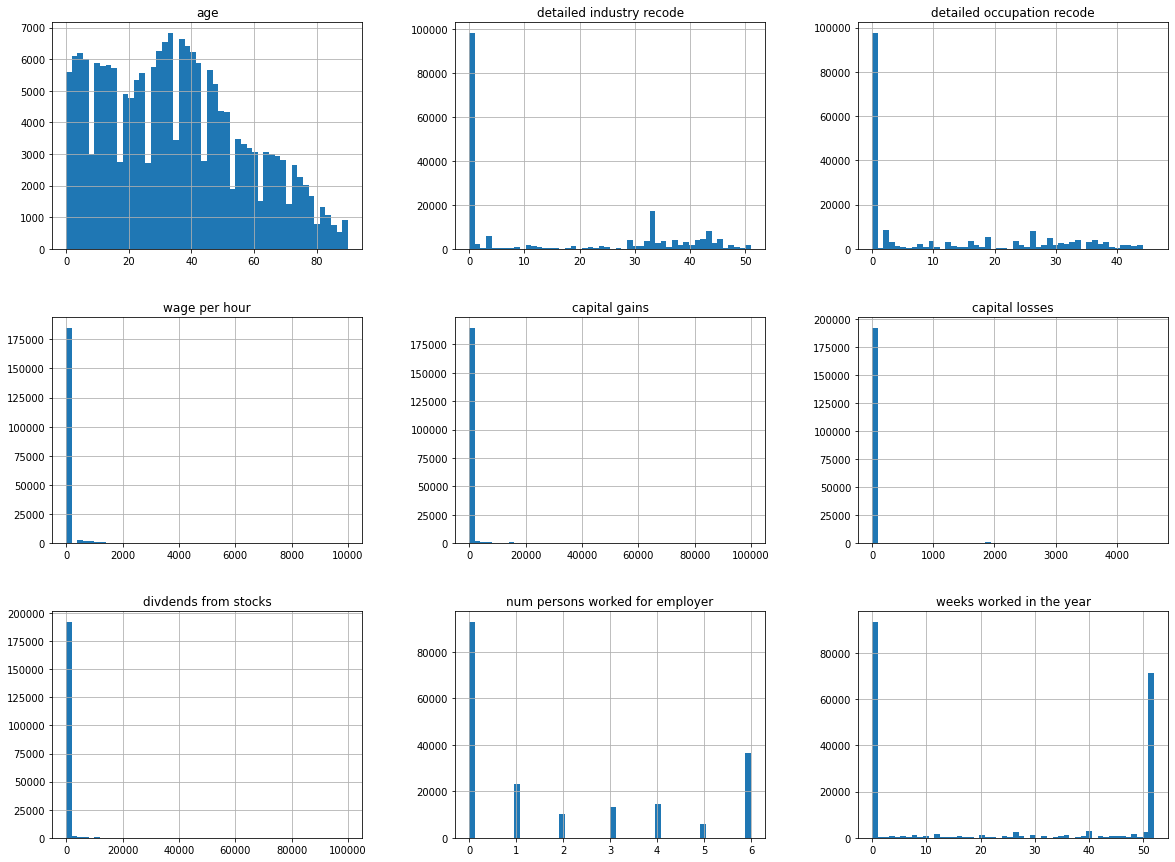

In [23]:

explore_train.select_dtypes(include=['float64', 'int64']).hist(bins=50, figsize=(20,15))
plt.show()

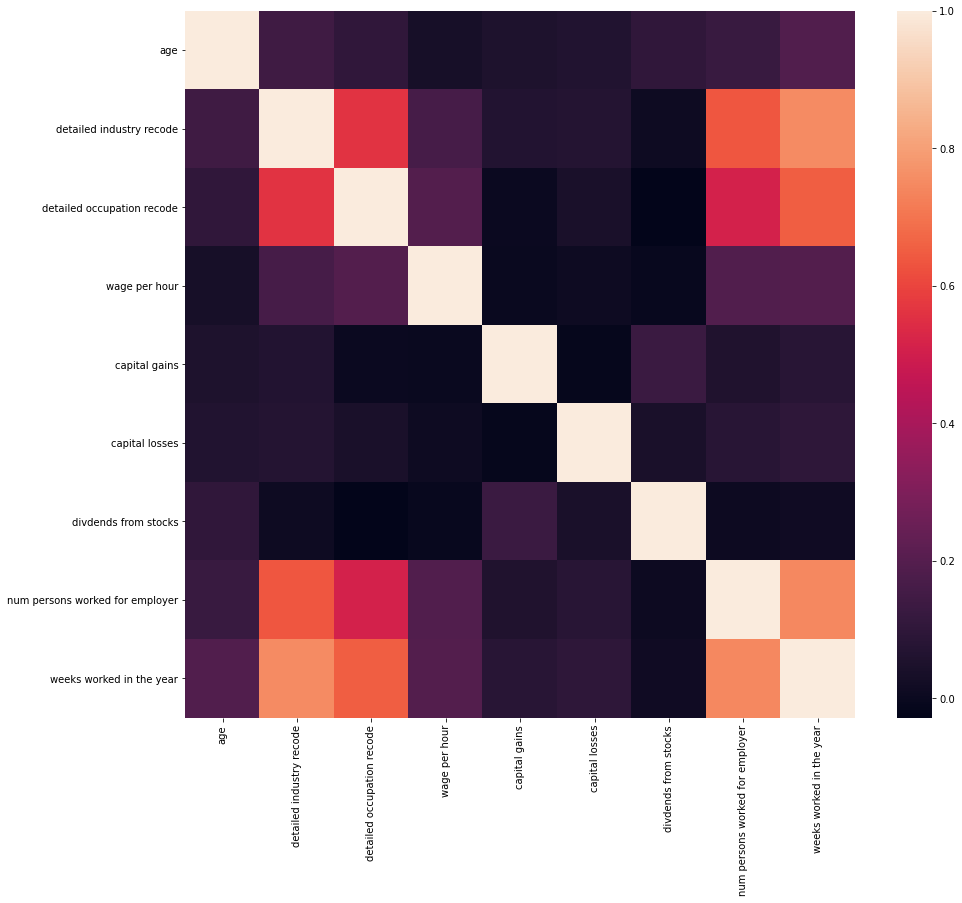

In [24]:
plt.subplots(figsize=(15,13))
sns.heatmap(explore_train.select_dtypes(include=['float64', 'int64']).corr())

### detailed industry recode will be removed highly correlated with weeks worked in the year

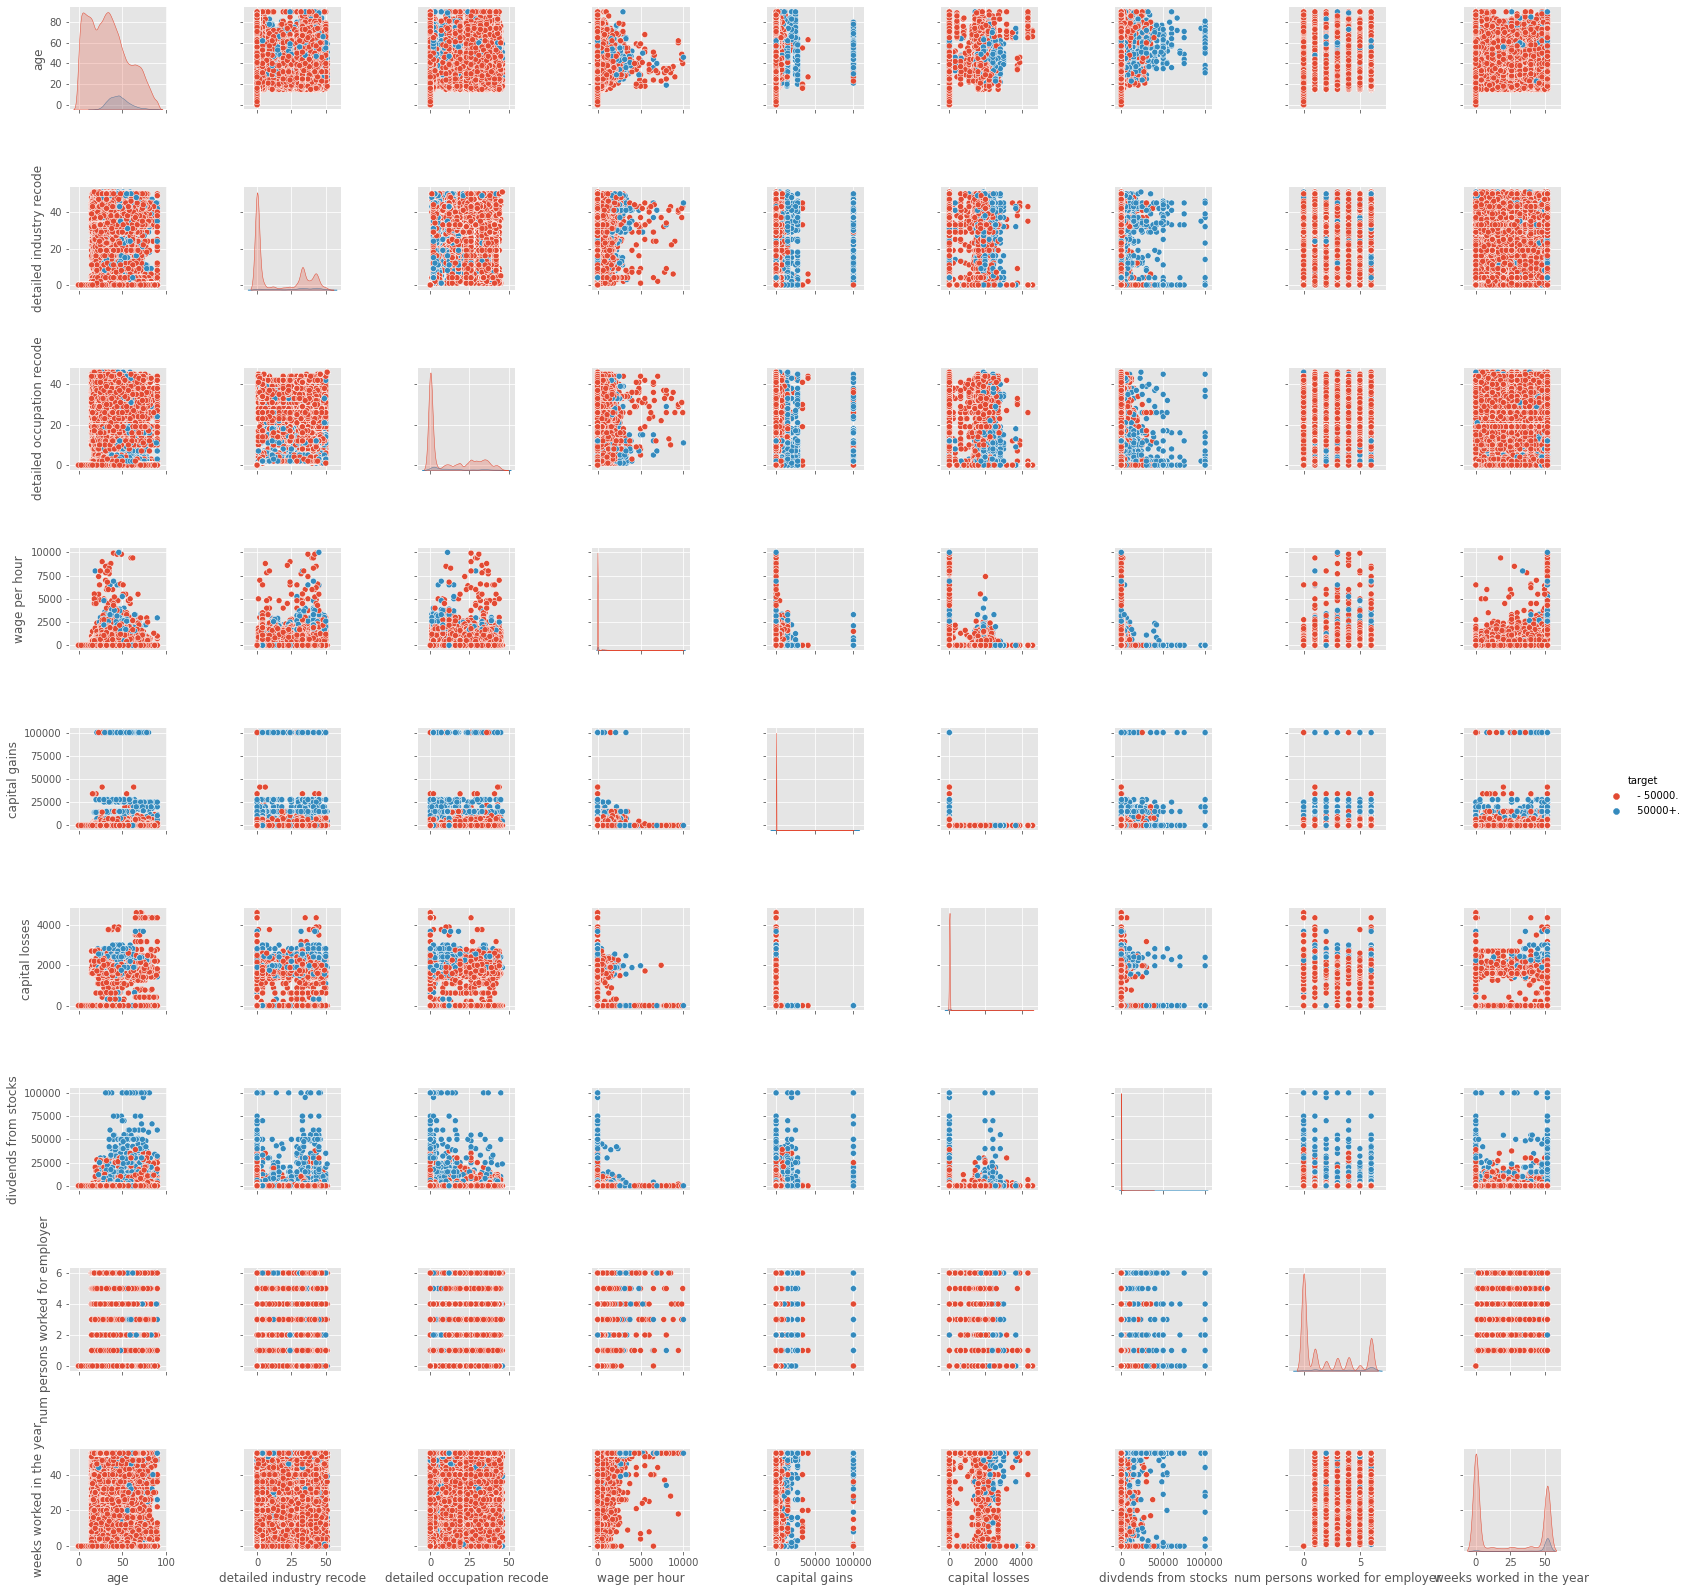

In [258]:
import seaborn as sns 
numeric_by_target = pd.concat([explore_train.select_dtypes(include=['float64', 'int64']), train['target']], axis=1)
sns.pairplot(numeric_by_target, hue="target")

In [25]:
categorical_var = explore_train.select_dtypes(exclude=['float64', 'int64'])
categorical_features = list(categorical_var)
categorical_features

['class of worker',
 'education',
 'marital stat',
 'major industry code',
 'major occupation code',
 'race',
 'sex',
 'full or part time employment stat',
 'tax filer stat',
 'detailed household summary in household',
 'migration code-change in msa',
 'migration code-change in reg',
 'migration code-move within reg',
 'family members under 18',
 'country of birth father',
 'country of birth mother',
 'country of birth self',
 'citizenship',
 'target']

/Users/heps/Desktop/dataiku/dataiku-technical-test/notebooks/utils.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["percent"] = [1] * len(data)


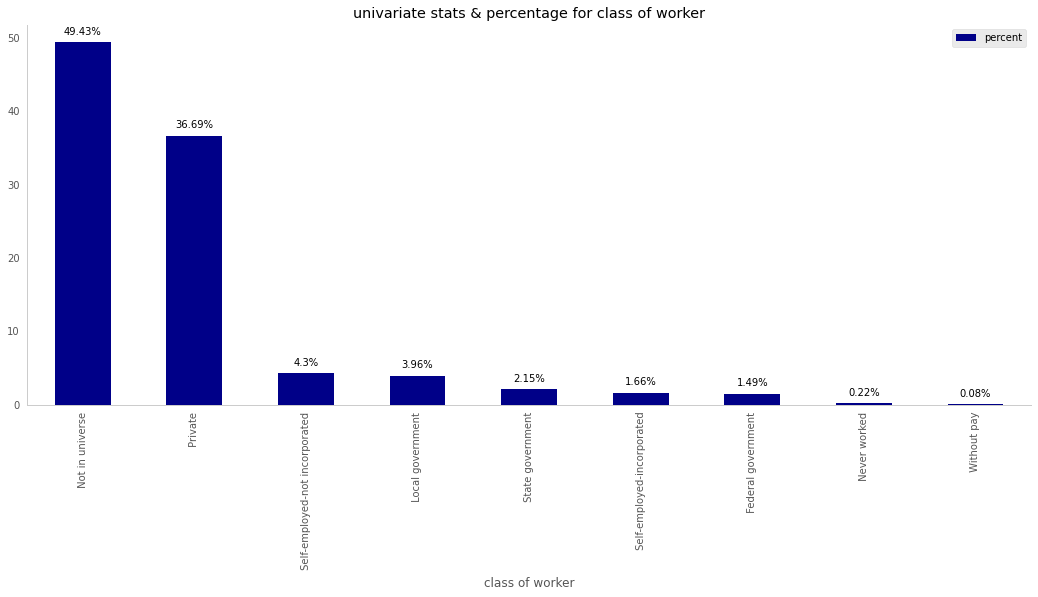

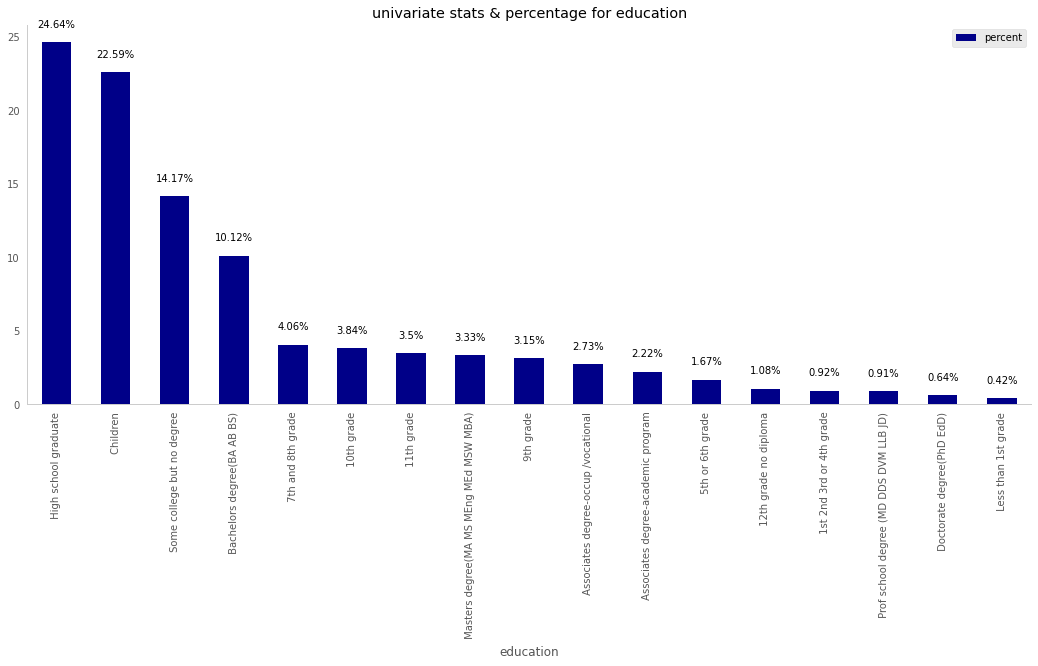

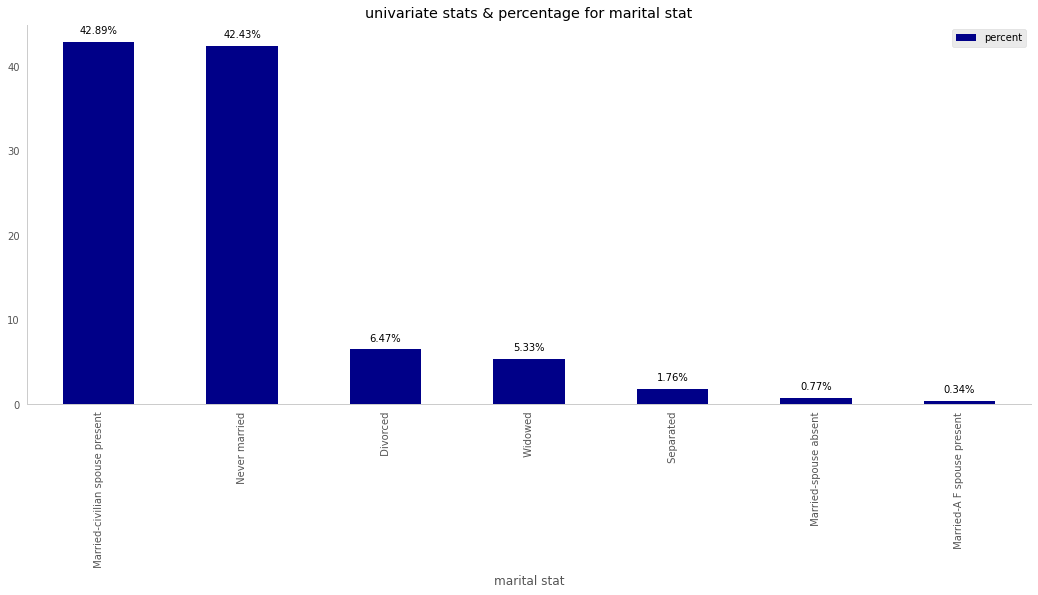

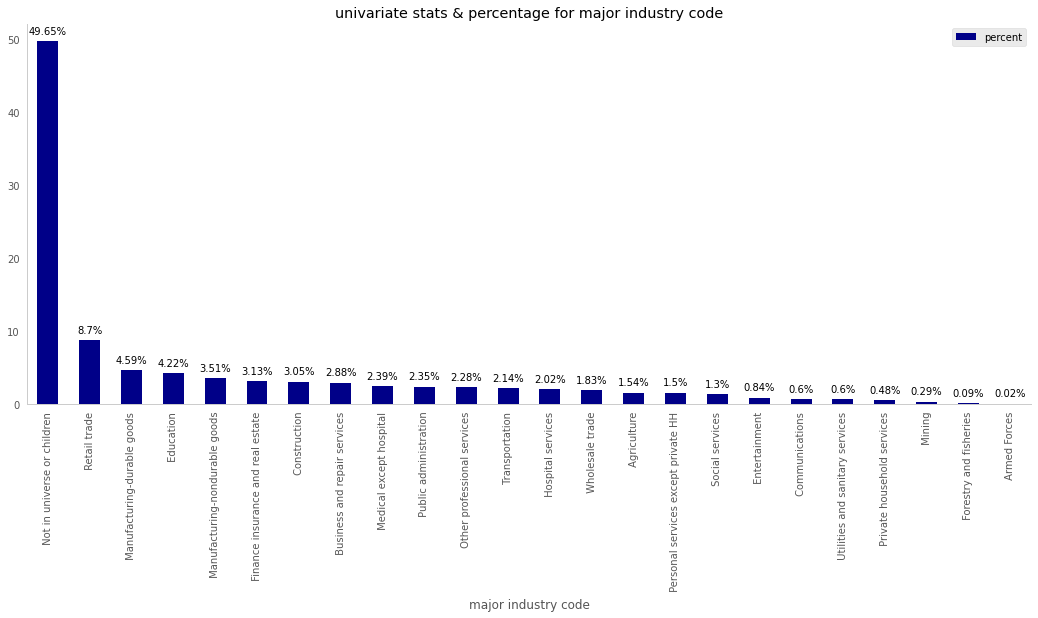

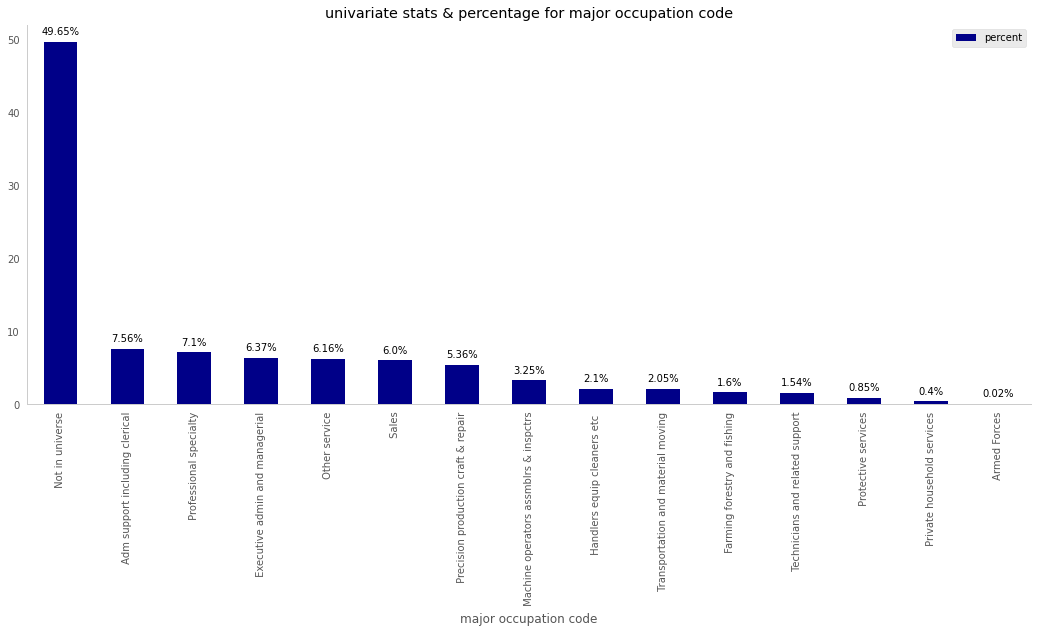

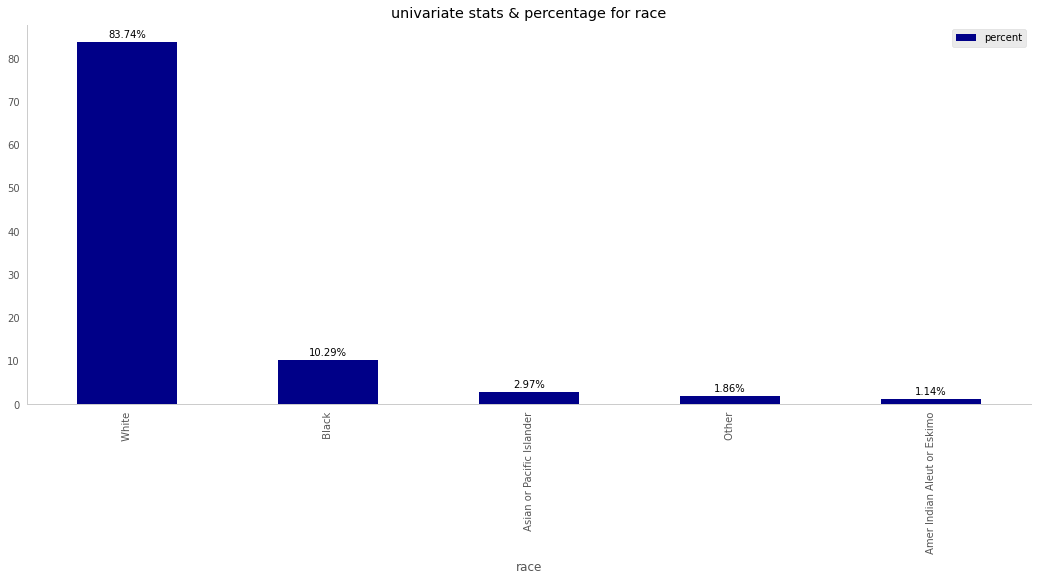

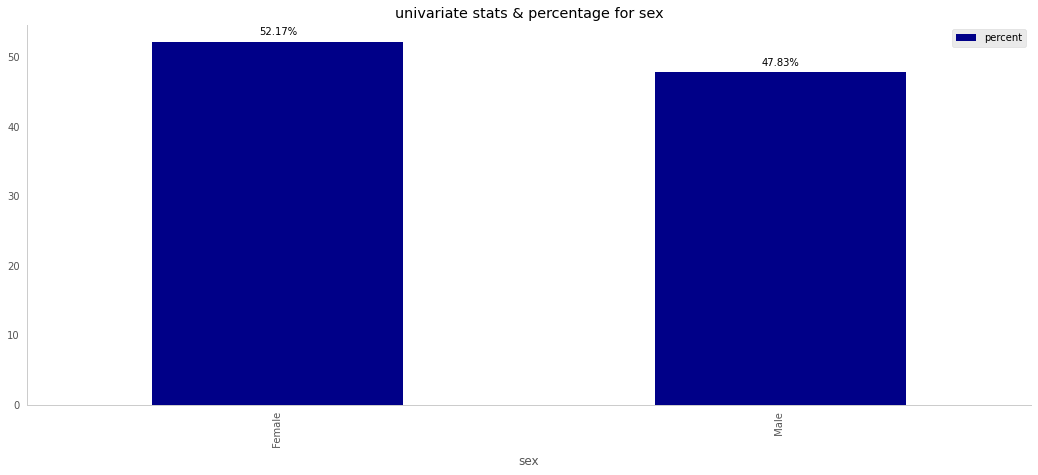

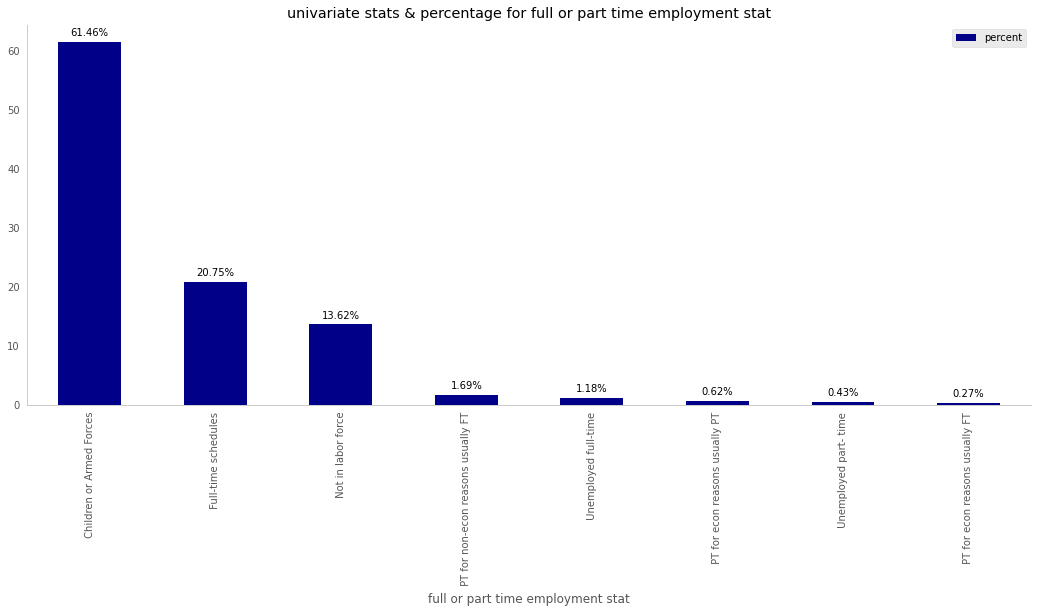

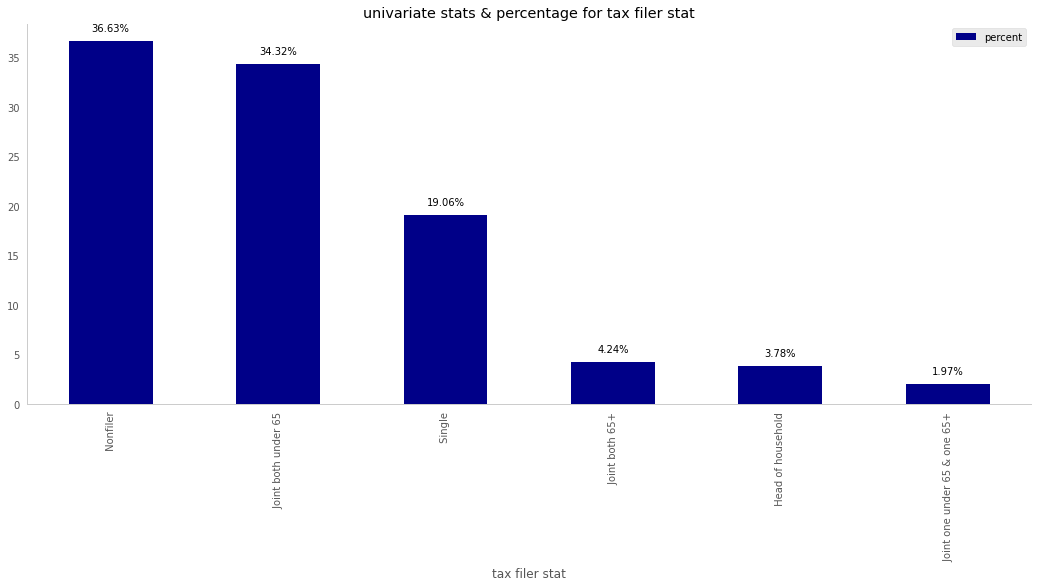

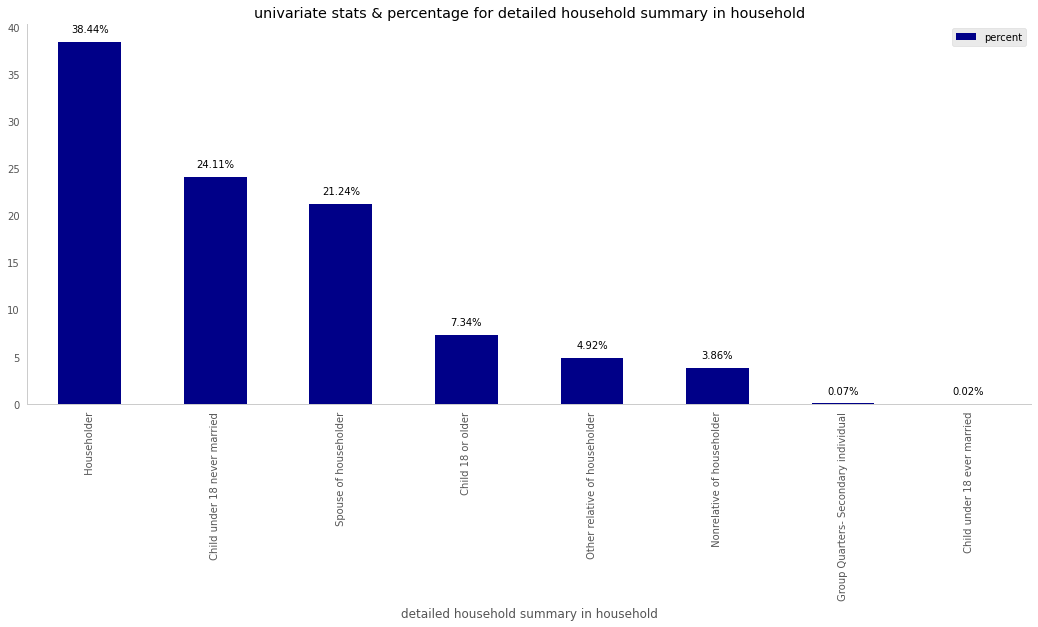

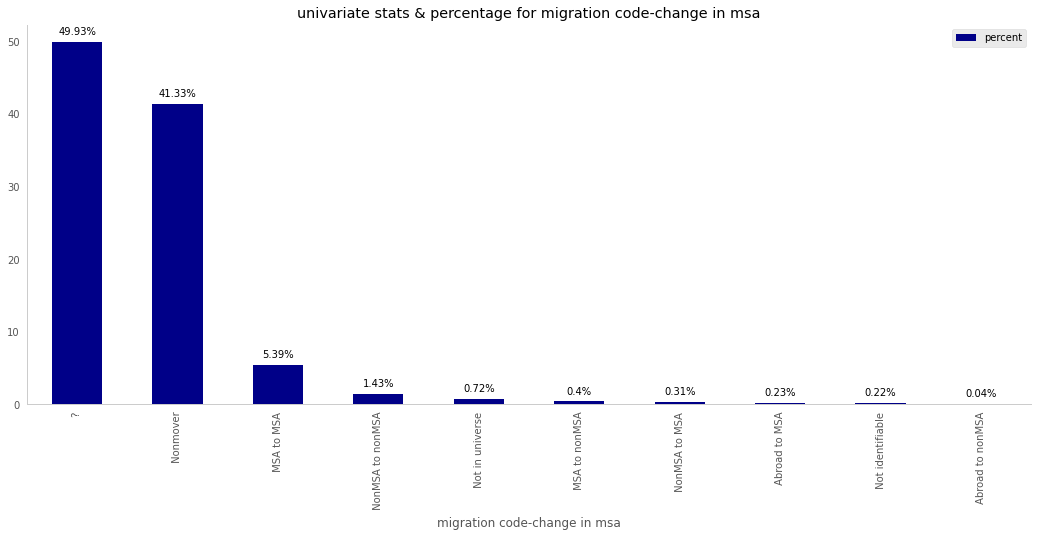

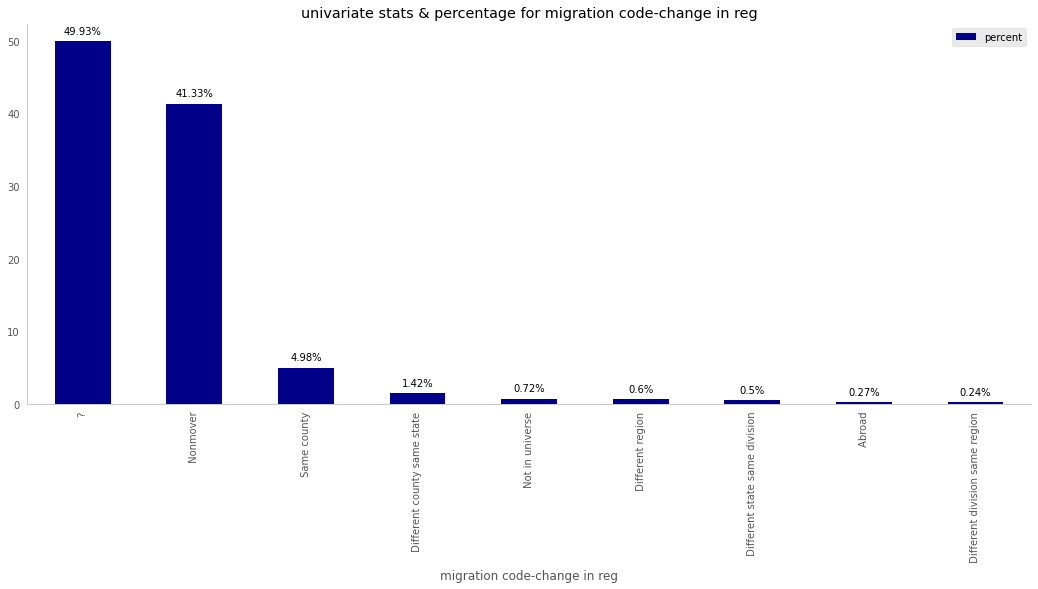

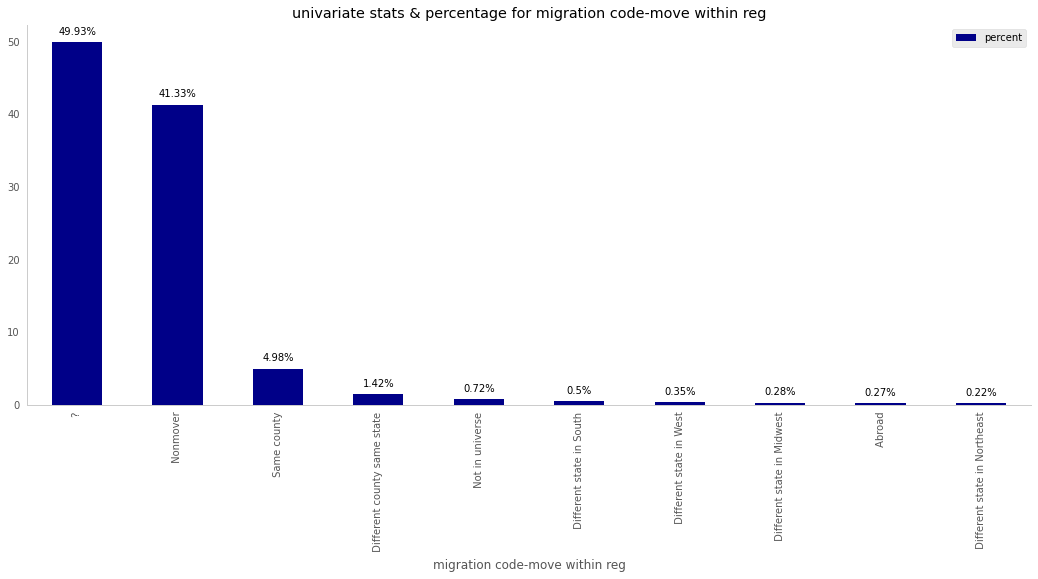

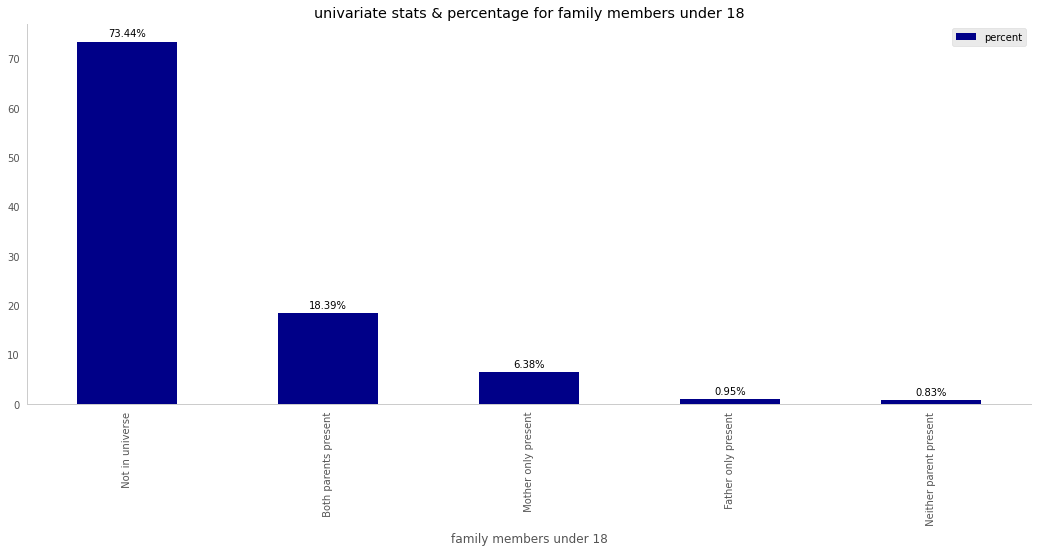

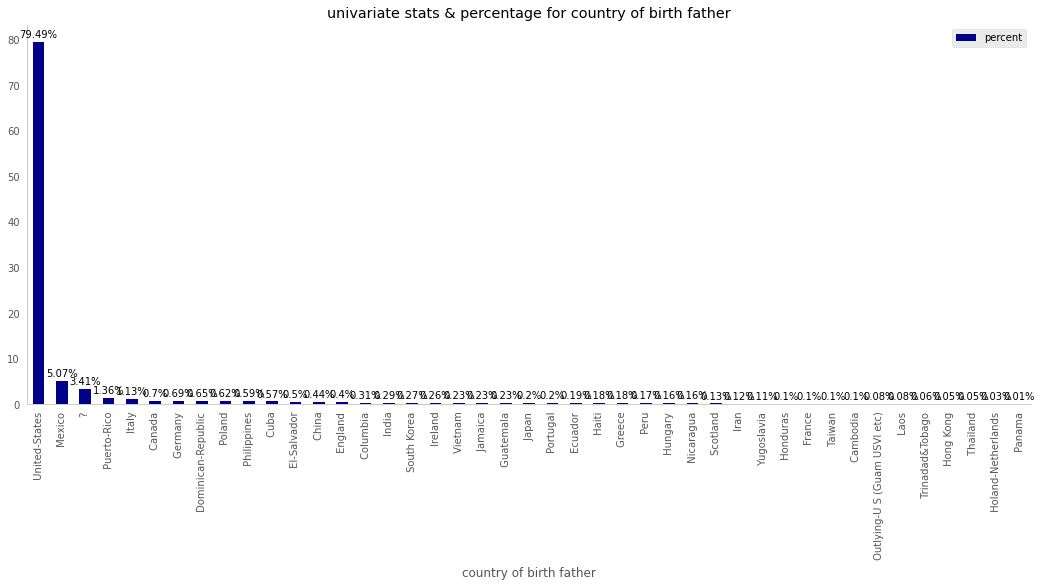

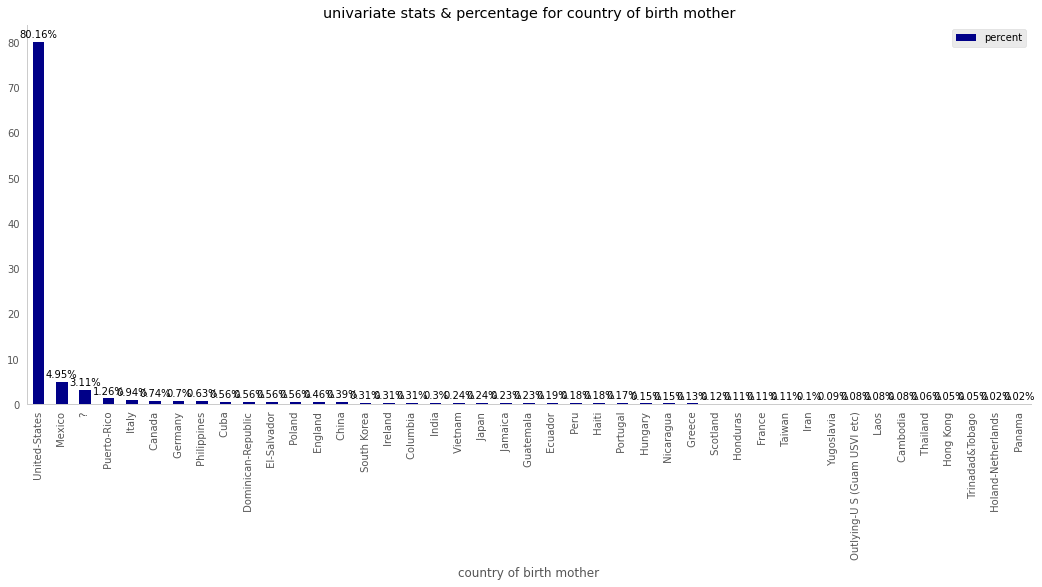

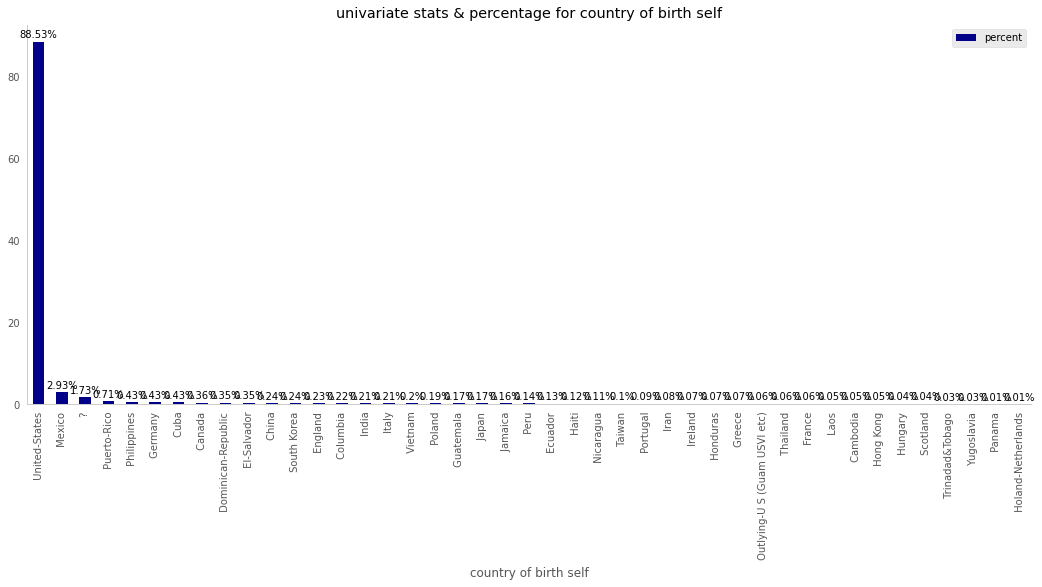

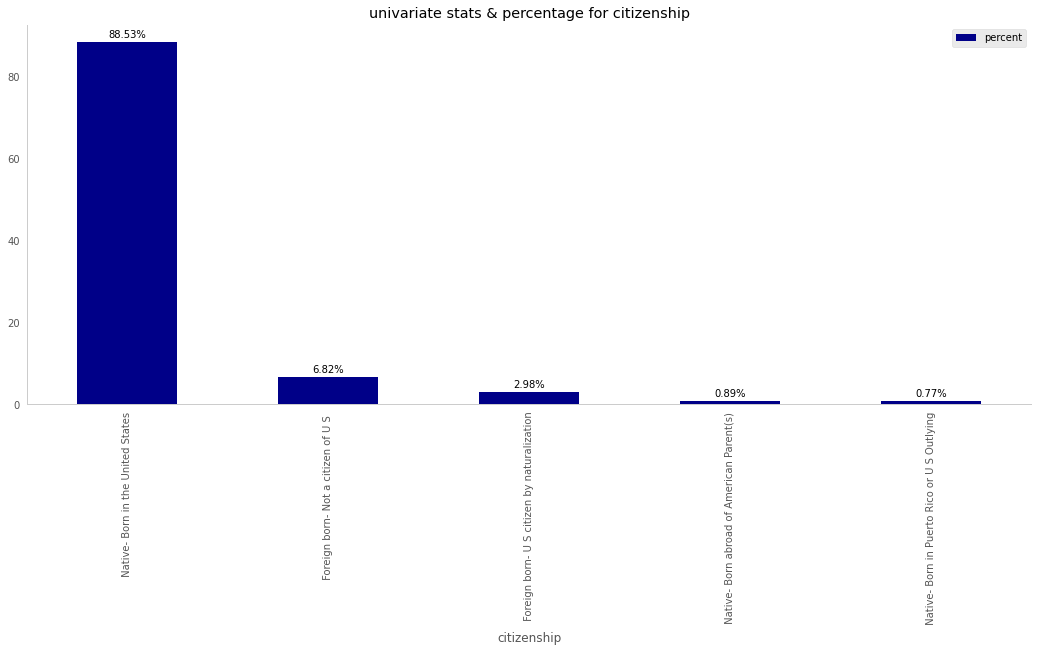

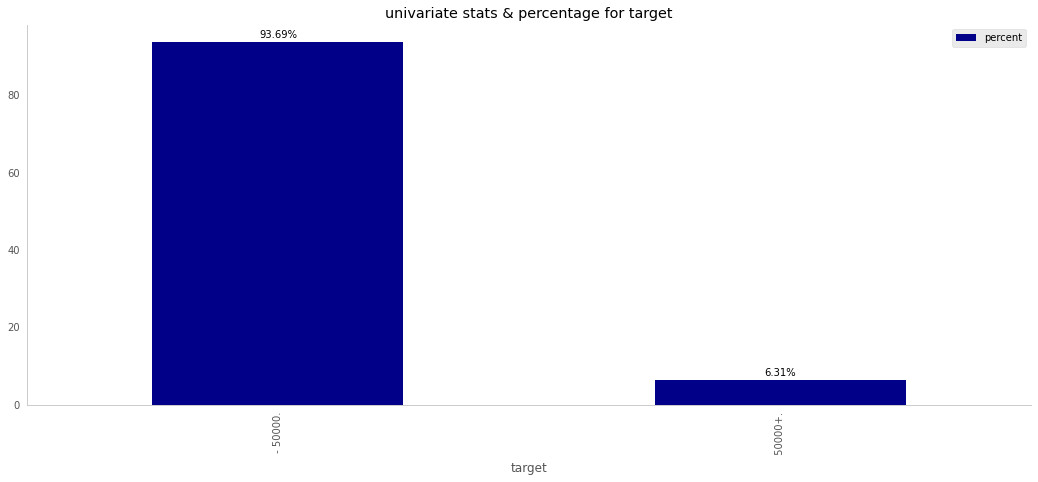

In [26]:
nrows, ncols = 1, 1
figsize = (18, 7)
plt.style.use('ggplot')
for col in categorical_features:
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    catstats(col, categorical_var, ax)

In [27]:
set(train['detailed household summary in household'])

{' Child 18 or older',
 ' Child under 18 ever married',
 ' Child under 18 never married',
 ' Group Quarters- Secondary individual',
 ' Householder',
 ' Nonrelative of householder',
 ' Other relative of householder',
 ' Spouse of householder'}

# Feature Engineering

In [28]:
# apply transformations 
features_to_transform = ['class of worker', 'education', 'marital stat', 'major industry code', 'major occupation code', 'race', 'full or part time employment stat', 'tax filer stat', 'detailed household summary in household', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship']

In [29]:
def transform_features(data, features):
    for feature in features:
        func = eval(f'reduce_{feature.replace(" ", "_")}')
        data[feature] = data[feature].apply(func)
    return data

In [30]:
transformed_train = transform_features(train.copy(), features_to_transform)
print(f'number of remaining features:  {len(list(transformed_train))}')

number of remaining features:  28


In [31]:
categorical_var = transformed_train.select_dtypes(exclude=['float64', 'int64'])
categorical_features = list(categorical_var)
nrows, ncols = 1, 1
figsize = (18, 7)
plt.style.use('ggplot')
for col in categorical_features:
    #fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    #catstats(col, categorical_var, ax)
    pass

In [32]:
transformed_train = transformed_train.replace(' ?', np.nan)

In [33]:
_, missing_info = missing_values(transformed_train)
missing_info

/Users/heps/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,total,percentage
migration code-move within reg,98014,49.932499
migration code-change in reg,98014,49.932499
migration code-change in msa,98014,49.932499
target,0,0.000000
full or part time employment stat,0,0.000000
class of worker,0,0.000000
detailed industry recode,0,0.000000
detailed occupation recode,0,0.000000
education,0,0.000000
wage per hour,0,0.000000


In [34]:
# categorical imputer 
categorical_missing_features = ['migration code-move within reg', 'migration code-change in reg', 'migration code-change in msa']
transformed_train = imputer_transform(transformed_train, categorical_missing_features)

In [35]:
transformed_train

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,marital stat,major industry code,major occupation code,race,...,migration code-change in reg,migration code-move within reg,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,weeks worked in the year,target
0,73,not_in_universe,0,0,median,0,not_married,not_in_universe,not_in_universe,white,...,Nonmover,Nonmover,0,Not in universe,UN,UN,UN,citizen,0,- 50000.
1,58,self,4,34,median,0,not_married,industry,field,white,...,Same county,Same county,1,Not in universe,UN,UN,UN,citizen,52,- 50000.
2,18,not_in_universe,0,0,low,0,not_married,not_in_universe,not_in_universe,minorities,...,Nonmover,Nonmover,0,Not in universe,OUT,OUT,OUT,no_citizen,0,- 50000.
3,9,not_in_universe,0,0,low,0,not_married,not_in_universe,not_in_universe,white,...,Nonmover,Nonmover,0,Both parents present,UN,UN,UN,citizen,0,- 50000.
4,10,not_in_universe,0,0,low,0,not_married,not_in_universe,not_in_universe,white,...,Nonmover,Nonmover,0,Both parents present,UN,UN,UN,citizen,0,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,not_in_universe,0,0,low,0,married,not_in_universe,not_in_universe,white,...,Nonmover,Nonmover,0,Not in universe,OUT,UN,UN,citizen,0,- 50000.
199519,65,self,37,2,low,0,married,services,not_field,white,...,Nonmover,Nonmover,1,Not in universe,UN,UN,UN,citizen,52,- 50000.
199520,47,not_in_universe,0,0,median,0,married,not_in_universe,not_in_universe,white,...,Nonmover,Nonmover,6,Not in universe,OUT,OUT,OUT,citizen,52,- 50000.
199521,16,not_in_universe,0,0,low,0,not_married,not_in_universe,not_in_universe,white,...,Nonmover,Nonmover,0,Both parents present,UN,UN,UN,citizen,0,- 50000.


In [36]:
# remove outliers 
transformed_train = outlier_transform(transformed_train)

In [37]:
# label encoding for categorical variable
transformed_train = label_encoder_transform(transformed_train)

In [38]:
transformed_train

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,marital stat,major industry code,major occupation code,race,...,migration code-change in reg,migration code-move within reg,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,weeks worked in the year,target
0,1.714115,1,-0.861747,-0.792548,2,-0.203342,1,3,2,1,...,5,6,-0.838500,4,1,1,1,0,-0.964191,0
1,1.038744,4,-0.640830,1.552583,2,-0.203342,1,2,0,1,...,7,8,-0.416737,4,1,1,1,0,1.164470,0
2,-0.762247,1,-0.861747,-0.792548,1,-0.203342,1,3,2,0,...,5,6,-0.838500,4,0,0,0,1,-0.964191,0
3,-1.167470,1,-0.861747,-0.792548,1,-0.203342,1,3,2,1,...,5,6,-0.838500,0,1,1,1,0,-0.964191,0
4,-1.122445,1,-0.861747,-0.792548,1,-0.203342,1,3,2,1,...,5,6,-0.838500,0,1,1,1,0,-0.964191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,2.344462,1,-0.861747,-0.792548,1,-0.203342,0,3,2,1,...,5,6,-0.838500,4,0,1,1,0,-0.964191,0
199519,1.353917,4,1.181734,-0.654599,1,-0.203342,0,6,1,1,...,5,6,-0.416737,4,1,1,1,0,1.164470,0
199520,0.543471,1,-0.861747,-0.792548,2,-0.203342,0,3,2,1,...,5,6,1.692077,4,0,0,0,0,1.164470,0
199521,-0.852297,1,-0.861747,-0.792548,1,-0.203342,1,3,2,1,...,5,6,-0.838500,0,1,1,1,0,-0.964191,0


# modeling 

In [39]:
from train import Train

In [40]:
features, target = transformed_train.drop('target', axis=1), transformed_train.target

In [41]:
training = Train(features, target)
predict_result = training.train()

Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.944505
[200]	valid's auc: 0.945227
[300]	valid's auc: 0.945483
Early stopping, best iteration is:
[278]	valid's auc: 0.94556
Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.944474
[200]	valid's auc: 0.945289
Early stopping, best iteration is:
[245]	valid's auc: 0.945486
Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.944382
[200]	valid's auc: 0.945347
[300]	valid's auc: 0.945545
Early stopping, best iteration is:
[251]	valid's auc: 0.945609
Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.944306
[200]	valid's auc: 0.944976
Early stopping, best iteration is:
[225]	valid's auc: 0.945113
Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.944351
[200]	valid's auc: 0.945238
Early stopping, best iteration is:
[235]	valid's auc: 0.945342
Training until validation scores don't improv

roc 0.8732443795842117


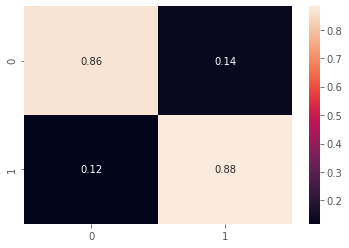

In [45]:
accuracy, roc, confusion_matrix, feature_importance = predict_result.values()
print("roc {}".format(roc))
sns.heatmap(confusion_matrix, annot=True)

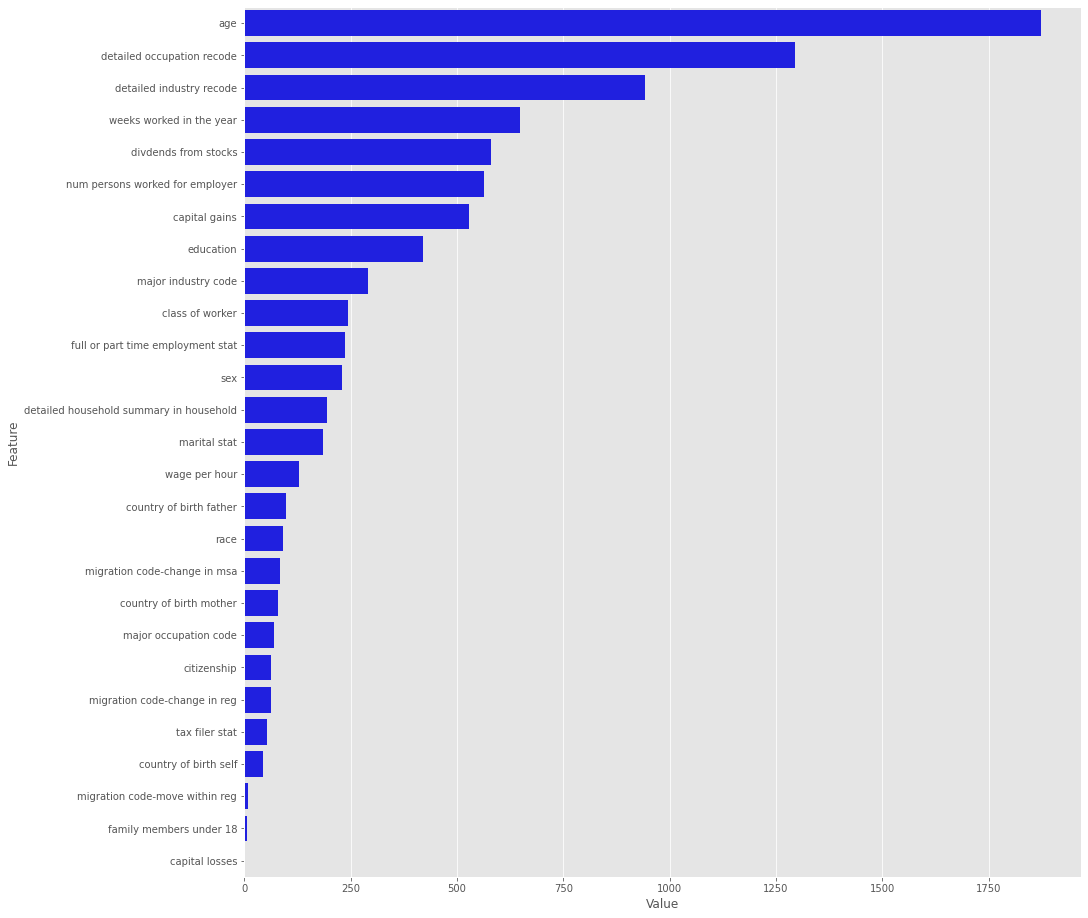

In [46]:
# model interpretability 
plt.figure(figsize=(15, 16))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False), color="b")